In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


# Copying the dataset so the actual dataset remain intact.

In [3]:
df_copy = df.copy()


In [4]:
#remove duplicates
df_copy.drop_duplicates(inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


# Data Preprocessing

In [5]:
df_copy['type_cat'] = df_copy['type'].map({'organic': 1, 'conventional': 0})
# df_copy = pd.get_dummies(df_copy,columns=['type'],drop_first= True)

In [6]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['Year']= df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Week'] = df_copy['Date'].dt.isocalendar().week

In [7]:
df_copy.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region',
       'type_cat', 'Year', 'Month', 'Week'],
      dtype='object')

In [8]:
df_copy.isnull().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
type_cat            0
Year                0
Month               0
Week                0
dtype: int64

In [9]:
df_copy.fillna(0,inplace=True)

In [10]:
df_copy.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region',
       'type_cat', 'Year', 'Month', 'Week'],
      dtype='object')

In [11]:
df_copy.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,type_cat,Year,Month,Week
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,0,2015,1,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,1,2015,1,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,0,2015,1,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta,1,2015,1,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington,0,2015,1,1


#Plot to check Avocado Volume sales by type 'Conventional' or 'Organic' per Year

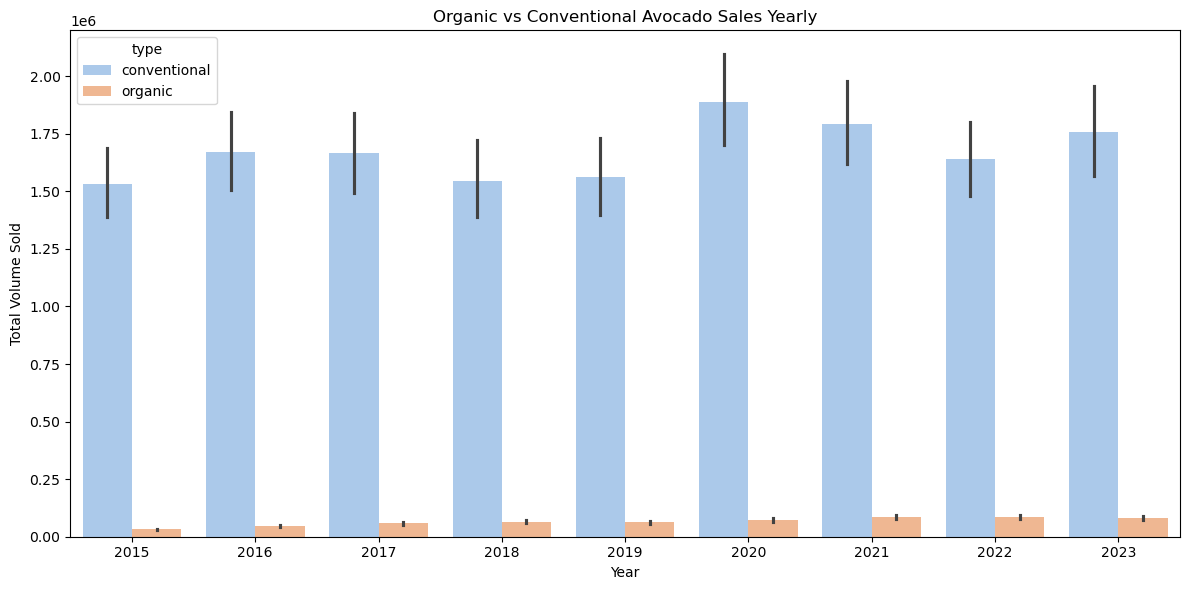

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_copy, y='TotalVolume',x='Year',hue='type',palette='pastel')
#sns.light_palette("seagreen", as_cmap=True)
plt.title('Organic vs Conventional Avocado Sales Yearly')
plt.xlabel('Year')
plt.ylabel('Total Volume Sold')
plt.tight_layout()
plt.show()

#Dropping empty weeks and resetting index 

In [13]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy = df_copy.set_index('Date')


weekly_sum = df_copy.resample('W').sum()
empty_weeks = weekly_sum[weekly_sum['TotalVolume'] == 0]

# Filter out rows that belong to zero-volume weeks
df_copy = df_copy[~df_copy.index.to_period('W').isin(empty_weeks.index.to_period('W'))]

# Optional: reset index if needed
df_copy = df_copy.reset_index()

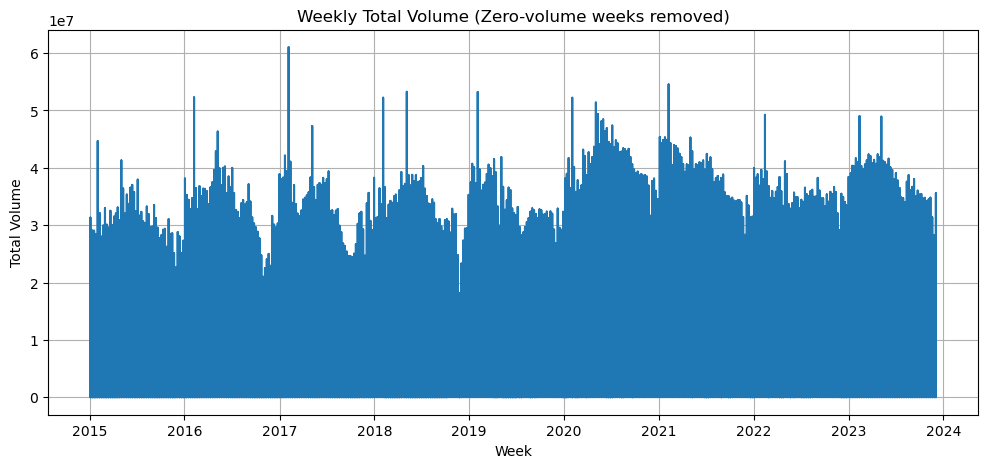

In [14]:

plt.figure(figsize=(12,5))
plt.plot(df_copy.set_index('Date')['TotalVolume'])
plt.title("Weekly Total Volume (Zero-volume weeks removed)")
plt.xlabel("Week")
plt.ylabel("Total Volume")
plt.grid(True)
plt.show()

#Outlier Detection for regions ['LosAngeles', 'DallasFtWorth', 'NewYork'] 


LosAngeles: 25 outliers (5.36%)

DallasFtWorth: 6 outliers (1.29%)

NewYork: 5 outliers (1.07%)


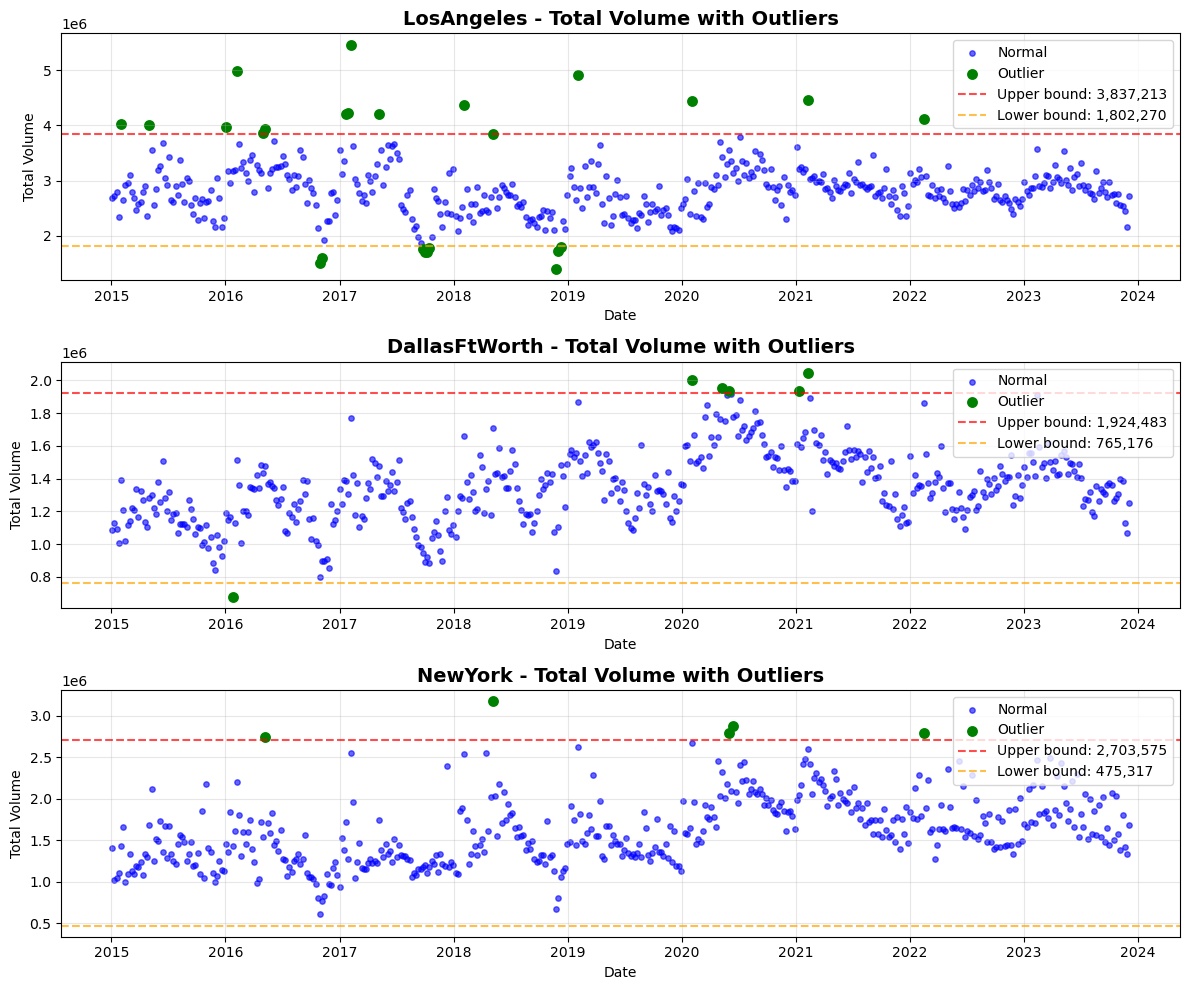

In [15]:
from scipy import stats

# Filter for the three regions

regions = ['LosAngeles', 'DallasFtWorth', 'NewYork']
df_filtered = df_copy[(df_copy['region'].isin(regions)) & (df_copy['type']=='conventional') ]

# IQR Method function
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Create visualization
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for idx, region in enumerate(regions):
    region_data = df_filtered[df_filtered['region'] == region]
    outliers, lower, upper = detect_outliers_iqr(region_data, 'TotalVolume')
    
    # Plot normal points
    normal_data = region_data[~region_data.index.isin(outliers.index)]
    axes[idx].scatter(normal_data['Date'], normal_data['TotalVolume'], 
                     alpha=0.6, label='Normal', s=15, color='blue')
    
    # Plot outliers in red
    axes[idx].scatter(outliers['Date'], outliers['TotalVolume'], 
                     color='green', label='Outlier', s=40, marker='o', 
                     edgecolors='green', linewidths=1.5)
    
    # Add threshold lines
    axes[idx].axhline(y=upper, color='red', linestyle='--', 
                     alpha=0.7, label=f'Upper bound: {upper:,.0f}')
    axes[idx].axhline(y=lower, color='orange', linestyle='--', 
                     alpha=0.7, label=f'Lower bound: {lower:,.0f}')
    
    axes[idx].set_title(f'{region} - Total Volume with Outliers', 
                       fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Total Volume')
    axes[idx].legend(loc='upper right')
    axes[idx].grid(True, alpha=0.3)
    
    outlier_pct = (len(outliers)/len(region_data)*100) if len(region_data) > 0 else 0
    print(f"\n{region}: {len(outliers)} outliers ({outlier_pct:.2f}%)")

plt.tight_layout()
plt.show()

#Seasonal Decompose Multiplicative or Additive 

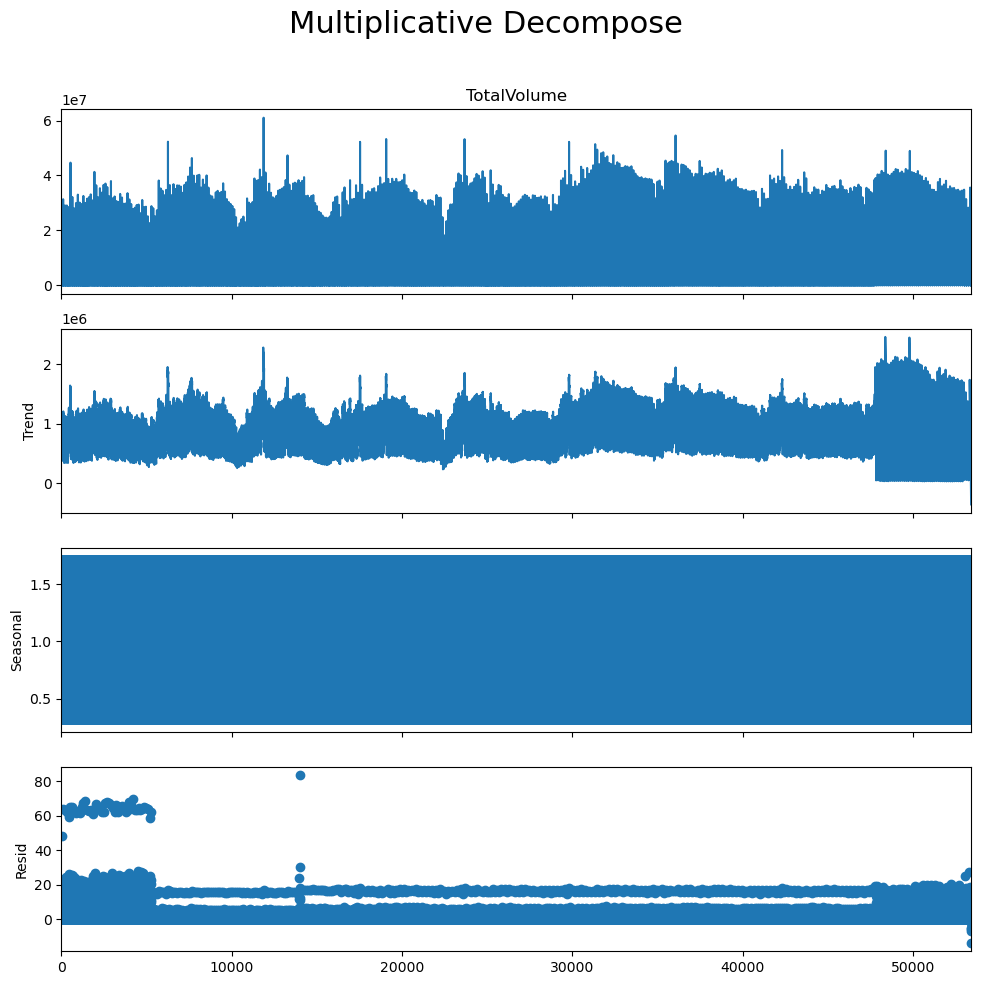

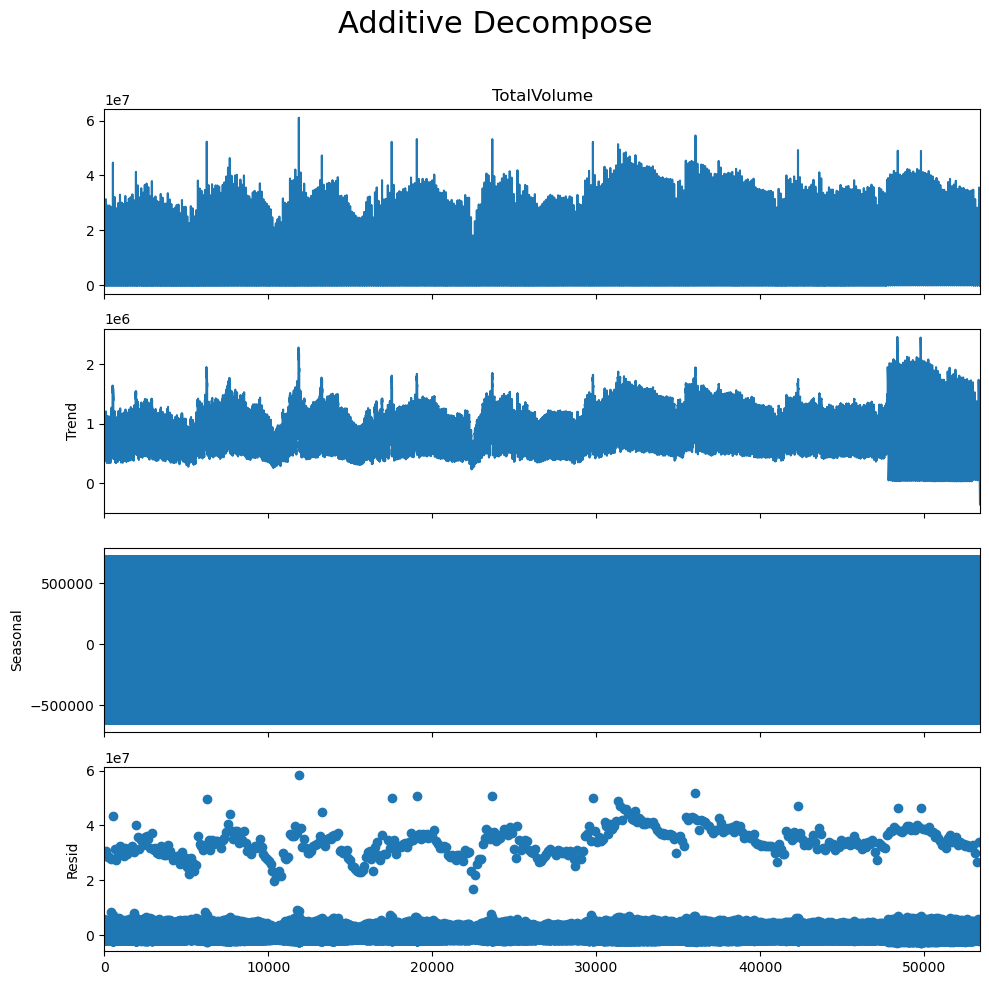

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition
result_mul = seasonal_decompose(df_copy['TotalVolume'], model= 'multiplicative', extrapolate_trend= 'freq',period =52)
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Reserve top 4% for title
plt.show()
#Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the
#beginning of the series.
# Additive Decomposition
result_add = seasonal_decompose(df_copy['TotalVolume'], model= 'additive', extrapolate_trend='freq',period= 52)
# Plot
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#Here multiplicative approach we will follow as there were less residuals 

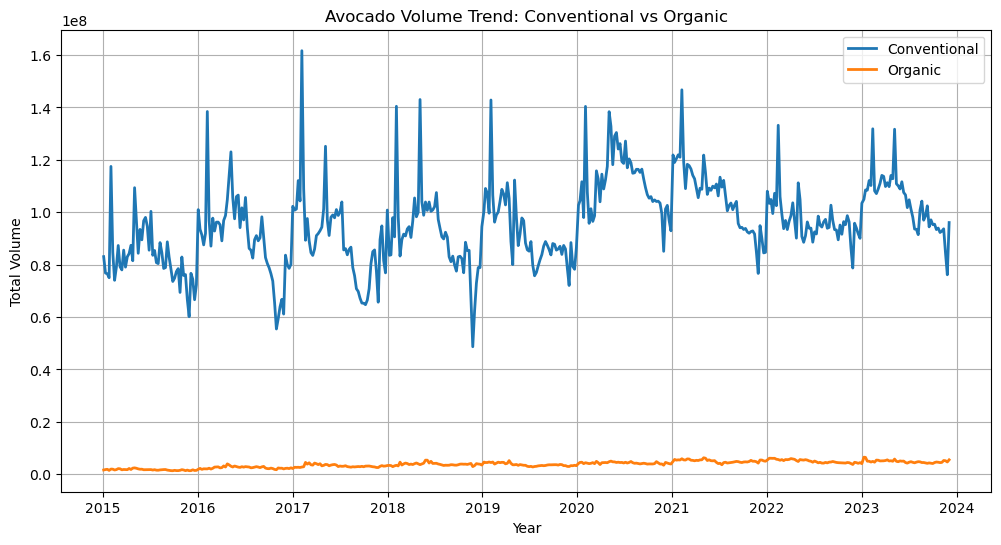

In [17]:


# Group by Date and Type and aggregate TotalVolume
df_type = df_copy.groupby(['Date', 'type'])['TotalVolume'].sum().reset_index()

# Pivot for plotting (columns = type, rows = Date)
df_pivot = df_type.pivot(index='Date', columns='type', values='TotalVolume')

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_pivot.index, df_pivot['conventional'], label='Conventional', marker='', linewidth=2)
plt.plot(df_pivot.index, df_pivot['organic'], label='Organic', marker='', linewidth=2)

plt.title("Avocado Volume Trend: Conventional vs Organic")
plt.xlabel("Year")
plt.ylabel("Total Volume")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
correlation = df_copy['AveragePrice'].corr(df_copy['TotalVolume'])
print(f'Correlation between Average Price and Total Volume: {correlation}')

Correlation between Average Price and Total Volume: -0.1791532485654005


<Axes: >

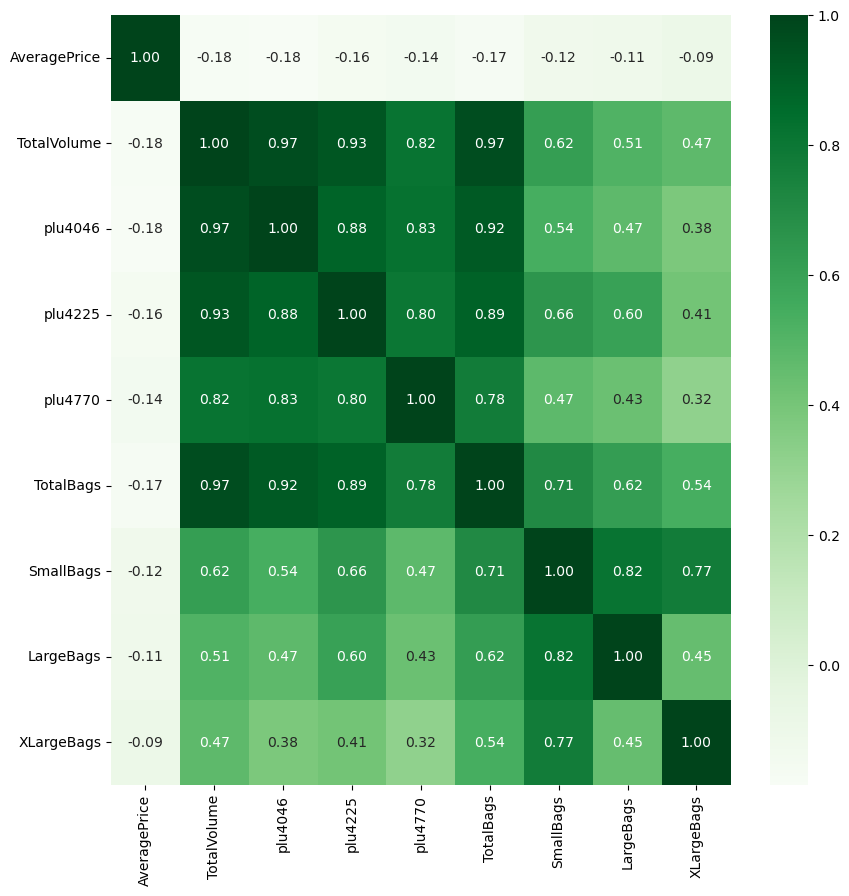

In [19]:
numeric_cols = ['AveragePrice','TotalVolume','plu4046','plu4225','plu4770',
                'TotalBags','SmallBags','LargeBags','XLargeBags']

corr = df_copy[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Greens")

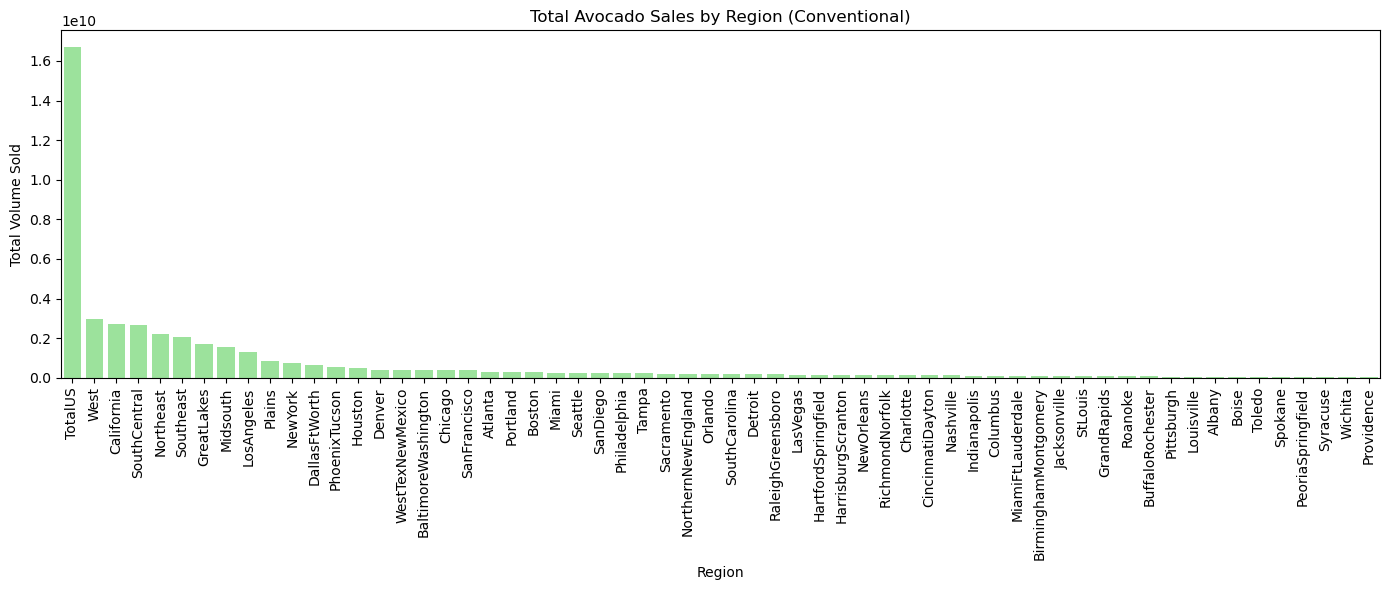

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_type = 'conventional'

regional_sales_filtered = (
    df_copy[df_copy['type'] == selected_type]
    .groupby(['region', 'type'], as_index=False)['TotalVolume']
    .sum()
    .sort_values(by='TotalVolume', ascending=False)
)

plt.figure(figsize=(14,6))


sns.barplot(data=regional_sales_filtered,
            x='region', y='TotalVolume',
            color='lightgreen') 

plt.xticks(rotation=90)
plt.title(f'Total Avocado Sales by Region ({selected_type.title()})')
plt.xlabel('Region')
plt.ylabel('Total Volume Sold')
plt.tight_layout()
plt.show()

Selected cities from above graph
# LosAngeles
# DallasFtWorth
# NewYork 

# Choose the region to predict the forecast

In [21]:

regions = ['LosAngeles', 'DallasFtWorth', 'NewYork']
df_filtered = df_copy[(df_copy['region'].isin(regions)) & (df_copy['type']=='conventional') ]

# Separating the timeseries for each region

In [22]:
series_dict = {}

for r in regions:
    temp = df_filtered[df_filtered['region'] == r]

    temp = (
        temp.set_index('Date')
            .resample('W')['TotalVolume']
            .sum()
            .loc[lambda s: s > 0]   # Keep only weeks with actual volume
    )
    # added Log for transforming TotalVolume 
    #temp = np.log(temp)
    series_dict[r] = temp



#Dividing Training and Test sets

In [23]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

def ar_forecast(series):
    
    historic = series.iloc[: int(len(series) * 0.7)]
    test = series.iloc[int(len(series) * 0.7):]


    historic_list = historic.tolist()
    predictions = []

    for i in range(len(test)):
        sel = ar_select_order(historic_list, 13, old_names=False)
        model_fit = sel.model.fit()

        pred = model_fit.predict(
            start=len(historic_list),
            end=len(historic_list)
        )

        predictions.append(pred[0])
        historic_list.append(test.iloc[i])

    cross_val = pd.Series(predictions, index=test.index)

    return historic, test, cross_val

#metrics

In [24]:
from sklearn import metrics

results = {}

for region, series in series_dict.items():
    historic, test, cross_val = ar_forecast(series)

    mae = metrics.mean_absolute_error(test, cross_val)
    mse = metrics.mean_squared_error(test, cross_val)
    rmse = metrics.mean_squared_error(test, cross_val, squared=False)
    mape = metrics.mean_absolute_percentage_error(test, cross_val)

    results[region] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape
    }

results_df = pd.DataFrame(results).T
print(results_df)

                         MAE           MSE           RMSE      MAPE
LosAngeles     231561.397146  1.971005e+11  443960.006909  0.072564
DallasFtWorth  105696.586543  4.646657e+10  215561.056886  0.069320
NewYork        252410.203945  1.443807e+11  379974.573845  0.130453


# Forecast for next 52 weeks, (1 year has 52 weeks)


In [26]:
def forecast_future(series, n_pred=52):
    # Ensure weekly frequency and fill missing weeks
    series = series.asfreq('W')
    series = series.interpolate() 
    
    # Generate future weekly dates
    date_pred = pd.date_range(
        series.index[-1] + pd.Timedelta("7 days"),
        periods=n_pred,
        freq='W'
    )
    
    # Automatic AR lag selection
    sel = ar_select_order(series, 13, old_names=False)
    model_fit = sel.model.fit()
    
    # Forecast n_pred periods ahead
    pred = model_fit.predict(
        start=len(series),
        end=len(series) + n_pred - 1
    )


    # Attach the future dates to the forecasted values
    forecast = pd.Series(pred, index=date_pred)
    
    return forecast

# Run model for each region 

----- LosAngeles -----


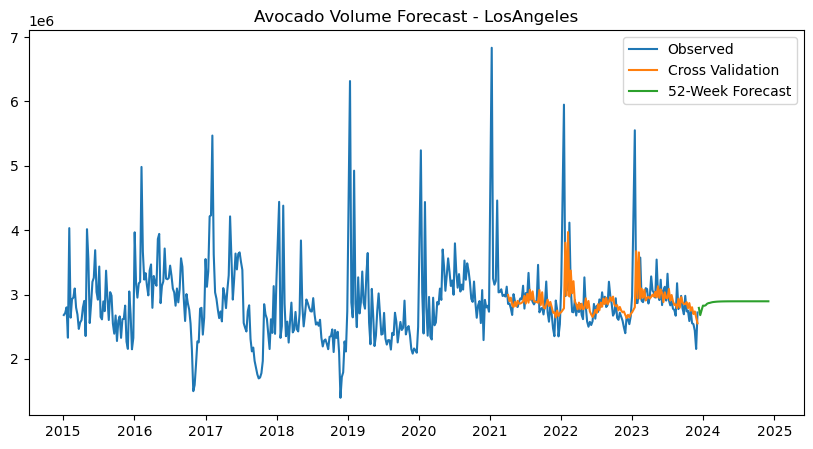

----- DallasFtWorth -----


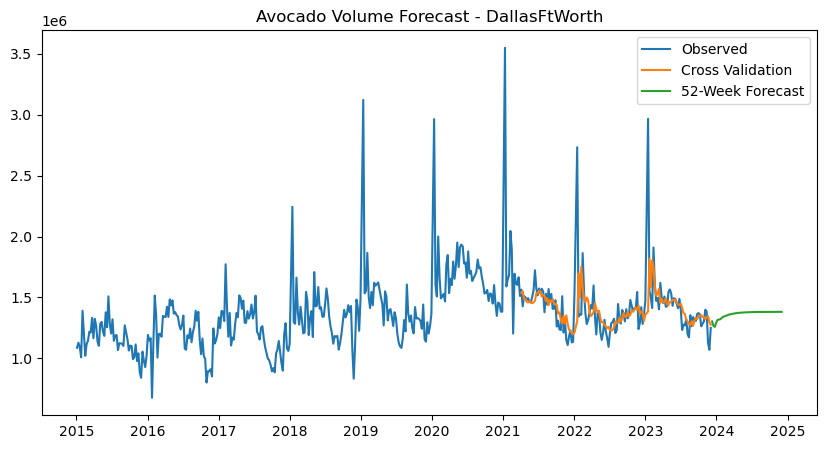

----- NewYork -----


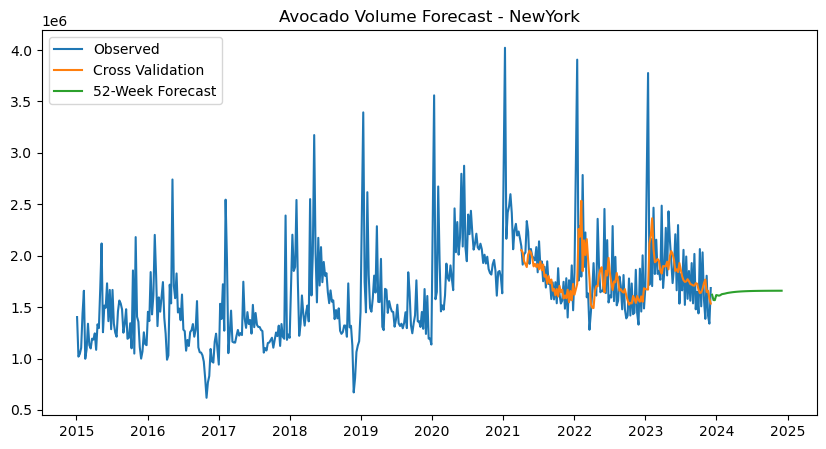

In [27]:
future_forecasts = {}  # store forecasts for all regions

for r in regions:
    print(f"----- {r} -----")

    series = series_dict[r]

    historic, test, cross_val = ar_forecast(series)

    # Get 52-week forecast
    forecast_52 = forecast_future(series, n_pred=52)

    # Save to dictionary
    future_forecasts[r] = forecast_52

    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(series, label='Observed')
    plt.plot(cross_val, label='Cross Validation')
    plt.plot(forecast_52, label='52-Week Forecast')
    plt.title(f"Avocado Volume Forecast - {r}")
    plt.legend()
    plt.show()

In [28]:
total_forecast_LA = future_forecasts['LosAngeles'].sum()
total_forecast_Dallas = future_forecasts['DallasFtWorth'].sum()
total_forecast_NY = future_forecasts['NewYork'].sum()
print(total_forecast_LA, total_forecast_Dallas, total_forecast_NY)

149738875.5835187 70875024.7071158 85551318.37640178


# Run model for each region 

In [30]:

# regions and conventional
target_regions = ['LosAngeles', 'DallasFtWorth', 'NewYork']
df_filtered = df_copy[(df_copy['region'].isin(target_regions)) & (df_copy['type'] == 'conventional')]
# region and sum the volumes for each PLU/Total Volume
volume_analysis = df_filtered.groupby('region')[['plu4046', 'plu4225', 'plu4770', 'TotalVolume']].sum()
# percentage share for each PLU
volume_analysis['PLU 4046 (%)'] = (volume_analysis['plu4046'] / volume_analysis['TotalVolume']) * 100
volume_analysis['PLU 4225 (%)'] = (volume_analysis['plu4225'] / volume_analysis['TotalVolume']) * 100
volume_analysis['PLU 4770 (%)'] = (volume_analysis['plu4770'] / volume_analysis['TotalVolume']) * 100
print("Volume Percentage Breakdown by Region (Conventional):")
print(volume_analysis[['PLU 4046 (%)', 'PLU 4225 (%)', 'PLU 4770 (%)']].round(2))

Volume Percentage Breakdown by Region (Conventional):
               PLU 4046 (%)  PLU 4225 (%)  PLU 4770 (%)
region                                                 
DallasFtWorth         45.00         17.05          1.42
LosAngeles            39.42         10.85          5.98
NewYork                5.92         61.50          0.51
